
# Convolutional Neural Networks for Image Classification
We will build a CNN model to classify the MNIST data set images.

### Imports

In [1]:
import pandas as pd
import numpy as np

### Loading the data

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

###  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape # 60,000 images in the training data set. Each image is a (28,28) matrix.

(60000, 28, 28)

In [5]:
single_image = x_train[0] 

In [6]:
single_image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

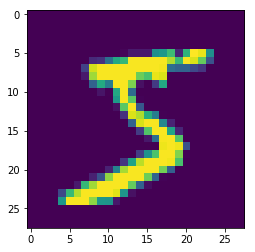

In [8]:
plt.imshow(single_image) # Visualizing the image 

## PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

### Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis.

In [11]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape # 60000 Y labels of training data

(60000,)

In [21]:
y_train[0] # Literal categories of numbers

5

In [18]:
y_cat_test = to_categorical(y_test,10) #Changing them with one-hot-encoding

In [17]:
y_cat_train = to_categorical(y_train,10) #Changing them with one-hot-encoding

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Processing X Data

We should normalize the X data

In [23]:
single_image.max()

255

In [24]:
single_image.min()

0

In [25]:
x_train = x_train/255 #Normalizing x_train
x_test = x_test/255 ##Normalizing x_test

In [26]:
scaled_single = x_train[0]

In [27]:
scaled_single.max()

1.0

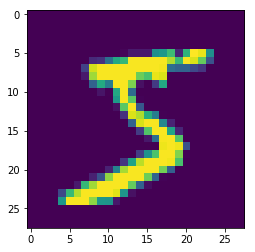

In [28]:
plt.imshow(scaled_single) #Doesn't impact the actual image since the ratios remain the same

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [31]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test = x_test.reshape(10000,28,28,1)

In [35]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.callbacks import EarlyStopping #Adding early stopping callback

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [41]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2802 - accuracy: 0.9163 - val_loss: 0.0692 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0438 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0461 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0313 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0446 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0405 - val_accuracy: 0.9888


## Evaluate the Model

In [42]:
model.metrics_names # All model metrics calculates > Loss and Accuracy

['loss', 'accuracy']

In [43]:
metrics = pd.DataFrame(model.history.history) # Making a dataframe of the metrics

In [44]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.139489,0.958183,0.069240,0.9779
1,0.046517,0.985383,0.043837,0.9862
2,0.029719,0.990633,0.046148,0.9859
3,0.020450,0.993517,0.031337,0.9890
4,0.014401,0.994950,0.044588,0.9860


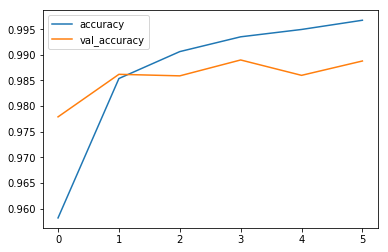

In [45]:
metrics[['accuracy','val_accuracy']].plot() #Plot of accuracy for training and testing data (Validation)

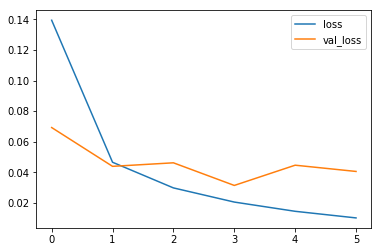

In [46]:
metrics[['loss','val_loss']].plot() #Plot of losses for training and testing data (Validation)

In [48]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0)) #Evaluating our model against test data

['loss', 'accuracy']
[0.0404970645904541, 0.9887999892234802]


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
predictions = model.predict_classes(x_test) #Prediciting using our model 

/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [51]:
y_cat_test.shape

(10000, 10)

In [52]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [53]:
predictions[0]

7

In [54]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [55]:
print(classification_report(y_test,predictions)) #Using classification report to check how well our model did

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
confusion_matrix(y_test,predictions) #Using a confusion matrix to check how our model did

array([[ 978,    0,    0,    0,    0,    0,    0,    0,    1,    1],
       [   1, 1125,    3,    1,    0,    1,    1,    1,    2,    0],
       [   0,    0, 1026,    0,    0,    0,    1,    3,    2,    0],
       [   0,    0,    4,  993,    0,    4,    0,    2,    7,    0],
       [   0,    0,    1,    0,  975,    0,    0,    0,    1,    5],
       [   2,    0,    0,    8,    0,  879,    1,    0,    2,    0],
       [   5,    2,    1,    0,    1,    2,  944,    0,    3,    0],
       [   0,    0,   10,    1,    0,    0,    0, 1008,    3,    6],
       [   2,    1,    2,    0,    0,    0,    0,    0,  967,    2],
       [   1,    2,    0,    1,    4,    1,    0,    4,    3,  993]])

In [57]:
import seaborn as sns

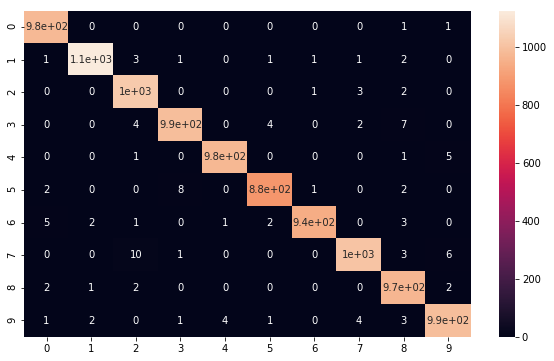

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# Visualizing the confusin matrix through a heatmap

## Predicting a given image

In [59]:
my_number = x_test[0]

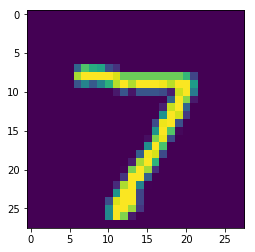

In [60]:
plt.imshow(my_number.reshape(28,28))

In [61]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

#### Our model predicted 7 number as a 7 which means it did well. Looks like our model is working quite well!